In [13]:
from datetime import datetime, timedelta
import re
import os
import base64
from dateutil import parser
from dateutil.tz import gettz
from io import BytesIO
from iptcinfo3 import IPTCInfo

from imagekitio import ImageKit
import requests
from exif import Image


In [2]:
import os
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"

In [3]:
import django
django.setup()
from fotoweb.models import Image as FImage

In [10]:
imagekit = ImageKit(
    private_key=os.environ['IMAGEKIT_PRIVATE_KEY'],
    public_key=os.environ['IMAGEKIT_PUBLIC_KEY'],
    url_endpoint=os.environ['IMAGEKIT_URL_ENDPOINT'],
)


In [70]:
from django.db import connection
connection.connect()

In [74]:
#ii = FImage.objects.filter(path__contains='Ben_Nevis')
#ii = FImage.objects.filter(path__contains='/zurich/')
ii = FImage.objects.filter(created_dt__gt='2021-01-01',created_dt__lt='2022-01-01')
len(ii)

779

In [75]:
imgs=[]
for i in ii:
    print(i.name)
    res = imagekit.list_files({'name':i.name})
    url=res['response'][0]['url']+'/tr:f-jpg,md-true'
    img=requests.get(url)
    image = Image(BytesIO(img.content))
    dt=image.get('datetime_original')
    if dt:
        dt=parser.parse(dt.replace(':','-',2)+'Z',tzinfos={'GMT':gettz('UTC')})
        print(dt)
        i=FImage.objects.get(name=i.name)
        i.created_dt=dt
        i.save()
        imgs.append([i.name,dt])
    
    
    
    

21-09-17-DSC03010-1.jpg
21-09-17-DSC02891-1.jpg
21-09-17-DSC02843-1.jpg
21-09-17-DSC02958-1.jpg
21-09-17-DSC03003-1.jpg
21-09-17-DSC02869-1.jpg
21-09-17-DSC02919-1.jpg
21-09-17-DSC02857-1.jpg
21-09-17-DSC02890-1.jpg
21-09-17-DJI_0342-1.jpg
21-09-17-DSC02747-1.jpg
21-09-17-DSC02816-1.jpg
21-09-17-DSC02860-1.jpg
21-09-17-DSC02824-1.jpg
21-09-17-DSC03009-1.jpg
21-09-17-DJI_0347-1.jpg
21-09-17-DSC02856-1.jpg
21-09-17-DSC02918-1.jpg
21-09-17-DSC03011-1.jpg
21-09-17-DSC02847-1.jpg
21-09-17-DSC02922-1.jpg
21-09-17-DSC03342-1.jpg
21-09-17-DSC02853-1.jpg
21-09-17-DSC02854-1.jpg
21-09-17-DJI_0330-1.jpg
21-09-17-DSC03018-1.jpg
21-09-17-DSC02836-1.jpg
21-09-17-DSC02923-1.jpg
21-09-17-DSC02915-1.jpg
21-09-17-DSC02959-1.jpg
21-09-17-DSC02887-1.jpg
21-09-17-DSC02829-1.jpg
21-09-17-DJI_0363-1.jpg
21-09-17-DSC03015-1.jpg
21-09-17-DSC02955-1.jpg
21-09-17-DSC02813-1.jpg
21-09-17-DSC02897-1.jpg
21-09-17-DSC02962-1.jpg
21-09-17-DSC02893-1.jpg
21-09-17-DSC02861-1.jpg
21-09-17-DSC02814-1.jpg
21-09-17-DSC0282

OperationalError: (2006, 'Server has gone away')

In [64]:
imgs

[['IMGP0325.jpg', datetime.datetime(2015, 6, 13, 16, 23, 12, tzinfo=tzutc())],
 ['IMGP0333.jpg', datetime.datetime(2015, 6, 13, 16, 24, 1, tzinfo=tzutc())],
 ['IMGP0334.jpg', datetime.datetime(2015, 6, 13, 16, 26, 41, tzinfo=tzutc())],
 ['IMGP0340.jpg', datetime.datetime(2015, 6, 13, 16, 29, 24, tzinfo=tzutc())],
 ['IMGP0341.jpg', datetime.datetime(2015, 6, 13, 16, 30, 31, tzinfo=tzutc())],
 ['IMGP0365.jpg', datetime.datetime(2015, 6, 13, 16, 53, 20, tzinfo=tzutc())],
 ['IMGP0376.jpg', datetime.datetime(2015, 6, 13, 16, 56, 38, tzinfo=tzutc())],
 ['IMGP0385.jpg', datetime.datetime(2015, 6, 14, 10, 40, 46, tzinfo=tzutc())],
 ['IMGP0388.jpg', datetime.datetime(2015, 6, 14, 10, 57, 15, tzinfo=tzutc())],
 ['IMGP0398.jpg', datetime.datetime(2015, 6, 14, 11, 18, 17, tzinfo=tzutc())],
 ['IMGP0401.jpg', datetime.datetime(2015, 6, 14, 11, 26, 36, tzinfo=tzutc())],
 ['IMGP0403.jpg', datetime.datetime(2015, 6, 14, 11, 26, 52, tzinfo=tzutc())],
 ['IMGP0406.jpg', datetime.datetime(2015, 6, 14, 11, 

In [66]:
from django.db import connection
connection.connect()
i=FImage.objects.get(name=imgs[0][0])
i

<Image: 962:IMGP0325.jpg>

In [67]:
i.created_dt =  imgs[0][1]
i.save()

In [62]:
parser.parse('2015:06:14 19:47:28Z'.replace(':','-',2),)

datetime.datetime(2015, 6, 14, 19, 47, 28, tzinfo=tzutc())

In [61]:
datetime.now()

datetime.datetime(2022, 4, 15, 14, 26, 39, 646122)

In [8]:
imagekit = ImageKit(
    private_key=os.environ['IMAGEKIT_PRIVATE_KEY'],
    public_key=os.environ['IMAGEKIT_PUBLIC_KEY'],
    url_endpoint=os.environ['IMAGEKIT_URL_ENDPOINT'],
)


In [52]:
from django.db import connection
connection.connect()

In [6]:
#fn='IMGP1532.jpg'
fn='22-01-21-DSC05150-1.jpg'
res = imagekit.list_files({'name':fn})
ben_nevis_2015
res

{'error': None,
 'response': [{'type': 'file',
   'name': '22-01-21-DSC05150-1.jpg',
   'createdAt': '2022-01-22T23:35:13.713Z',
   'updatedAt': '2022-01-22T23:37:41.520Z',
   'fileId': '61ec94b15a7b7c5da4ac7d64',
   'tags': None,
   'AITags': [{'name': 'Soil',
     'confidence': 99.99,
     'source': 'aws-auto-tagging'},
    {'name': 'Ground', 'confidence': 99.83, 'source': 'aws-auto-tagging'},
    {'name': 'Land', 'confidence': 99.47, 'source': 'aws-auto-tagging'},
    {'name': 'Nature', 'confidence': 99.47, 'source': 'aws-auto-tagging'},
    {'name': 'Outdoors', 'confidence': 99.47, 'source': 'aws-auto-tagging'},
    {'name': 'Field', 'confidence': 78.35, 'source': 'aws-auto-tagging'},
    {'name': 'Countryside', 'confidence': 67.28, 'source': 'aws-auto-tagging'},
    {'name': 'Castle', 'confidence': 53.45, 'source': 'aws-auto-tagging'},
    {'name': 'Building', 'confidence': 53.45, 'source': 'aws-auto-tagging'},
    {'name': 'Architecture',
     'confidence': 53.45,
     'source': 

In [10]:
url=res['response'][0]['url']+'/tr:f-jpg,md-true'
url

'https://ik.imagekit.io/jcu9wdm9ilp/C1/foto/Barnes_Castle/fotoweb-JPEG-2048-web/22-01-21-DSC05150-1.jpg/tr:f-jpg,md-true'

In [11]:
#url='https://ik.imagekit.io/jcu9wdm9ilp/C1/foto/Lost_Collections/zurich/JPEG-2048_web/tr:f-jpg,md-true/IMGP1532.jpg'
#url='https://ik.imagekit.io/jcu9wdm9ilp/C1/foto/Barnes_Castle/fotoweb-JPEG-2048-web/tr:f-jpg,md-true/22-01-21-DSC05150-1.jpg'
img=requests.get(url)
img

<Response [200]>

In [12]:
iptc = IPTCInfo(BytesIO(img.content),inp_charset='utf_8',out_charset='utf_8') 
iptc

In [13]:
iptc['time created']

'152530'

In [14]:
iptc['date created']

'20220121'

In [39]:
ii=Image.open(r'v:\C1\foto\Barnes Castle\fotoweb-JPEG-2048-web\22-01-21-DSC05150-1.jpg')


In [63]:
iptc.__dict__

{'_data': {20: [], 25: [], 118: []},
 '_fobj': <_io.BytesIO at 0x1dd6f8e9630>,
 '_filename': None,
 'inp_charset': 'utf_8',
 'out_charset': 'utf_8',
 'error': 'Marker scan hit start of image data'}

In [31]:
from exif import Image

In [21]:
image = Image(BytesIO(img.content))

In [8]:
with open(r'https://ik.imagekit.io/jcu9wdm9ilp/C1/foto/Barnes_Castle/fotoweb-JPEG-2048-web/22-01-21-DSC05150-1.jpg', "rb") as palm_1_file:
    image = Image(palm_1_file)

OSError: [Errno 22] Invalid argument: 'https://ik.imagekit.io/jcu9wdm9ilp/C1/foto/Barnes_Castle/fotoweb-JPEG-2048-web/22-01-21-DSC05150-1.jpg'

In [19]:
with open(r'v:\C1\foto\Barnes Castle\fotoweb-JPEG-2048-web\22-01-21-DSC05150-1.jpg', "rb") as palm_1_file:
    image = Image(palm_1_file)

In [22]:
image.get('datetime_original')

'2022:01:21 15:25:30'

In [78]:
image.list_all()

['image_description',
 'make',
 'model',
 'x_resolution',
 'y_resolution',
 'resolution_unit',
 'software',
 'artist',
 'copyright',
 '_exif_ifd_pointer',
 'compression',
 'jpeg_interchange_format',
 'jpeg_interchange_format_length',
 'exposure_time',
 'f_number',
 'exposure_program',
 'photographic_sensitivity',
 'sensitivity_type',
 'recommended_exposure_index',
 'exif_version',
 'datetime_original',
 'datetime_digitized',
 'shutter_speed_value',
 'aperture_value',
 'brightness_value',
 'exposure_bias_value',
 'max_aperture_value',
 'metering_mode',
 'light_source',
 'flash',
 'focal_length',
 'pixel_x_dimension',
 'pixel_y_dimension',
 'file_source',
 'scene_type',
 'custom_rendered',
 'exposure_mode',
 'white_balance',
 'digital_zoom_ratio',
 'focal_length_in_35mm_film',
 'scene_capture_type',
 'contrast',
 'saturation',
 'sharpness',
 'lens_specification',
 'lens_model']

In [85]:
image.datetime_original

'2022:01:21 15:25:30'

In [23]:
parser.parse(image.datetime_original)

datetime.datetime(2022, 4, 15, 15, 25, 30)

In [77]:
for t in image.list_all():
    print(t,image.get(t))

image_description Barnes Castle
make SONY
model ILCE-7M3
x_resolution 300.0
y_resolution 300.0
resolution_unit ResolutionUnit.INCHES
software Capture One 21 Windows
artist Valentine Kulikov "Vallka"


d:\a\simply-blog\.venv\lib\site-packages\exif\_image.py:171: RuntimeWarning: ASCII tag contains 0 fewer bytes than specified
  retval = self.__getattr__(attribute)


UnpackError: 

+--------+-----------+-------+-------------------------------------------------+-----------+
| Offset | Access    | Value | Bytes                                           | Format    |
+--------+-----------+-------+-------------------------------------------------+-----------+
|        |           |       |                                                 | ascii_str |
|        | [0:0]     | ''    |                                                 |           |
|  0     | --error-- |       | c2 a9 20 43 6f 70 79 72 69 67 68 74 20 32 30 30 |           |
| 16     |           |       | 30 2d 32 30 32 31 20 56 61 6c 6c 6b 61 20 2d 20 |           |
| 32     |           |       | 76 61 6c 6c 6b 61 2e 63 6f 6d                   |           |
+--------+-----------+-------+-------------------------------------------------+-----------+

UnicodeDecodeError occurred during unpack operation:

'ascii' codec can't decode byte 0xc2 in position 0: ordinal not in range(128)

In [44]:
iptc = IPTCInfo(r'v:\C1\foto\Barnes Castle\fotoweb-JPEG-2048-web\22-01-21-DSC05150-1.jpg',inp_charset='utf_8',out_charset='utf_8') 

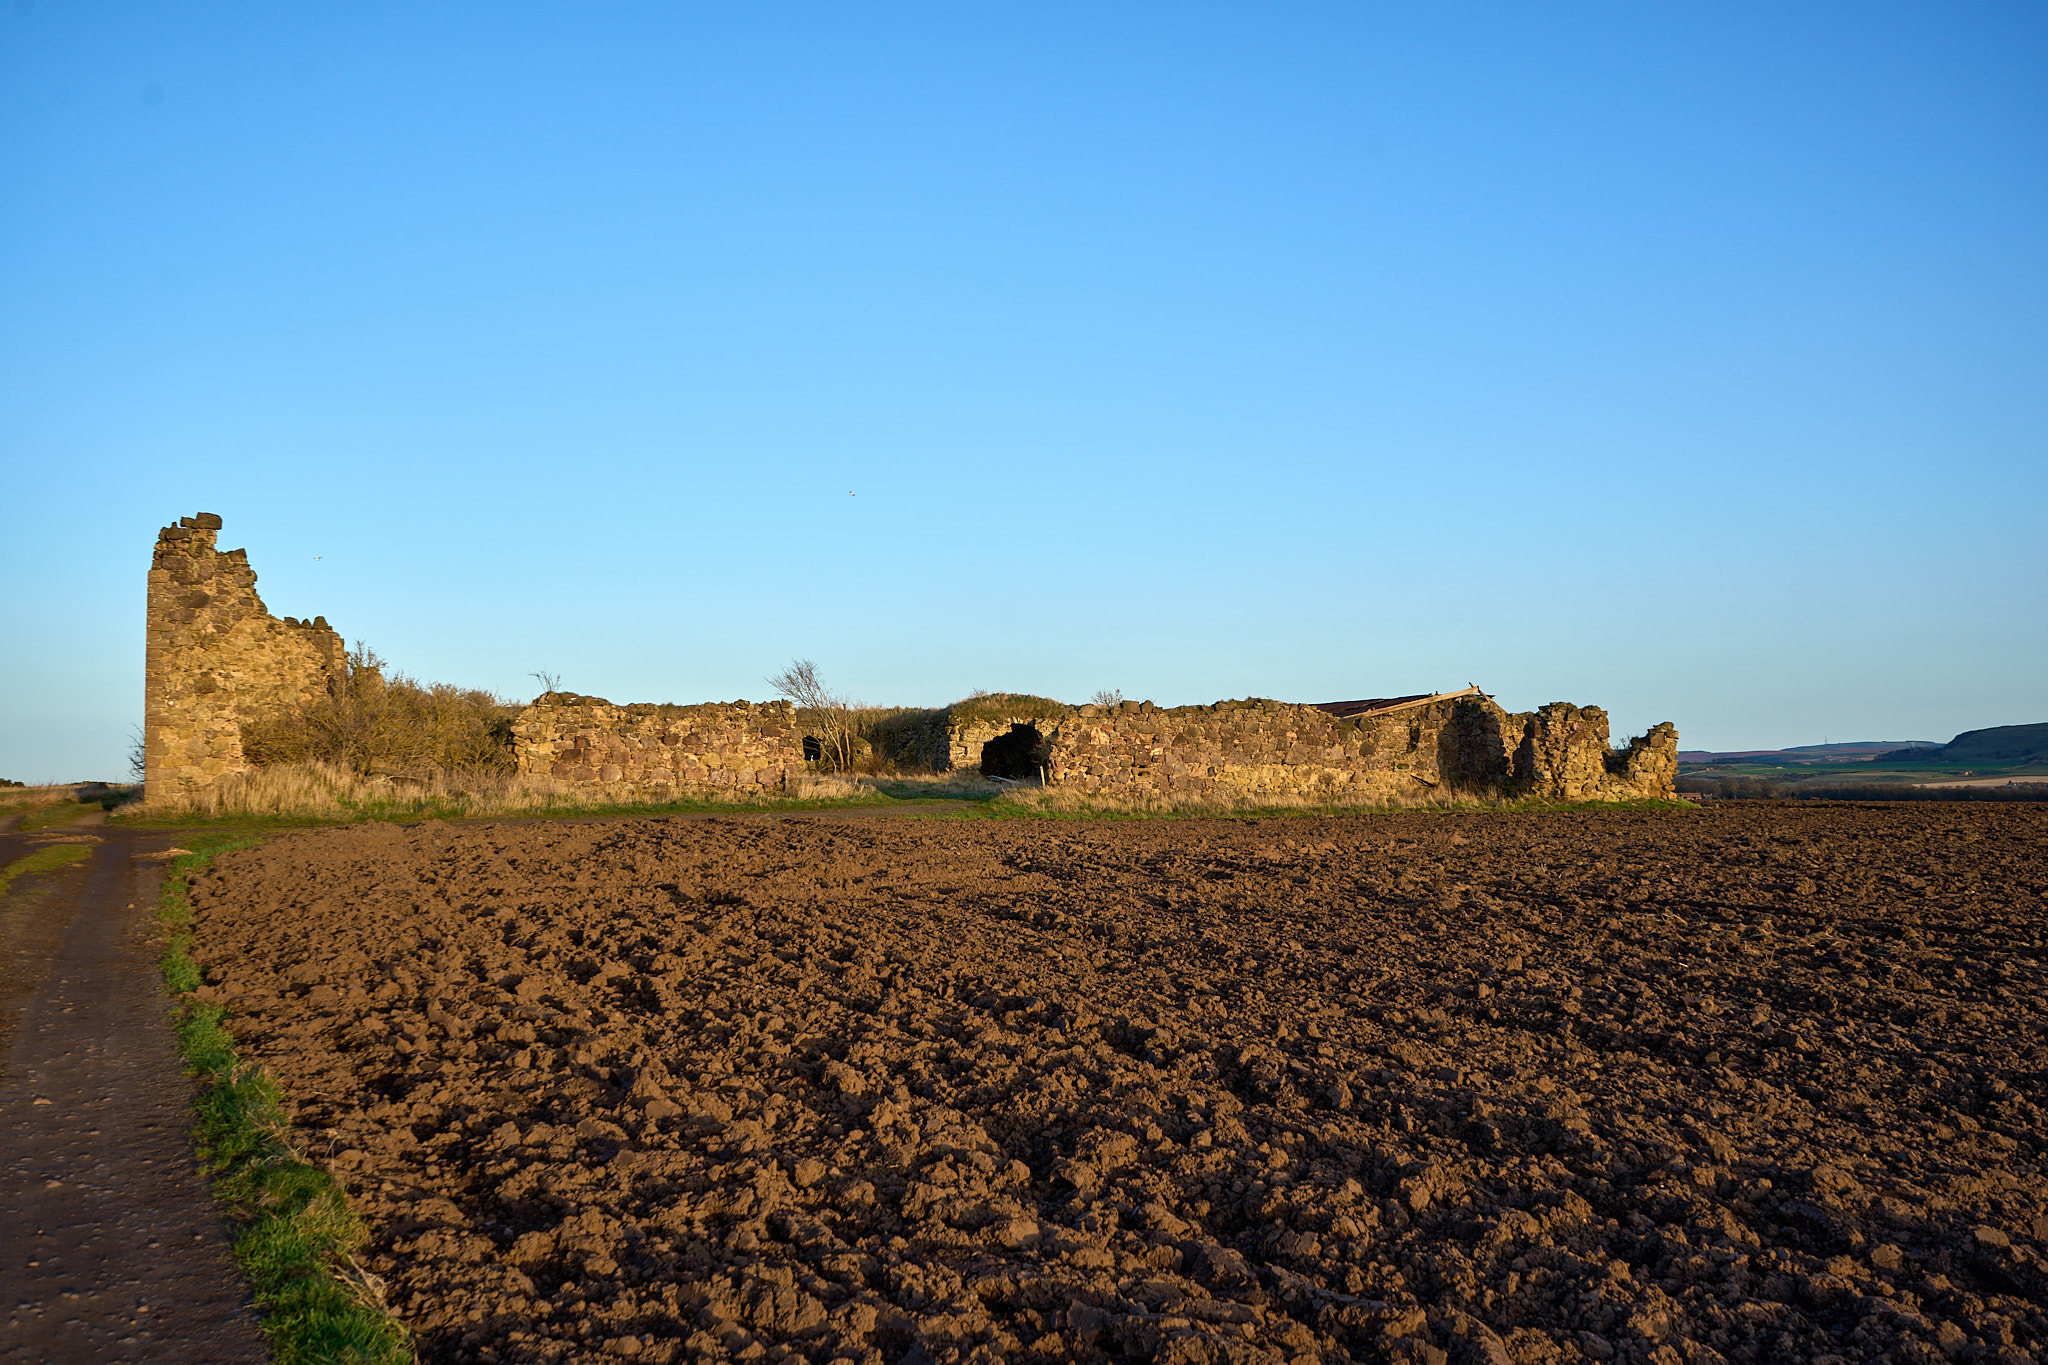

In [40]:
pil=ii
pil

In [26]:
from PIL import Image
from PIL.ExifTags import TAGS
import io

In [64]:
pil=Image.open(io.BytesIO(img.content))

In [65]:
exifdata=pil.getexif()
exifdata

In [68]:
exifdata.__dict__

{'_data': {296: 2,
  282: 300.0,
  34853: 16164,
  34665: 412,
  271: 'PENTAX              ',
  272: 'PENTAX K-30        ',
  305: 'SILKYPIX(R) Developer Studio 3.0.0.5 for PENTAX (SILKYPIX(R) Developer Studio 3.0.0.5 for PENTAX, ASCII, 48 components, 48 bytes)',
  274: 1,
  306: '2013:04:17 22:01:29',
  531: 2,
  283: 300.0,
  33432: ' ([None] (Photographer) - [None]',
  315: ''},
 '_ifds': {},
 '_info': <PIL.TiffImagePlugin.ImageFileDirectory_v2 at 0x1dd6f9357c0>,
 '_loaded_exif': b'Exif\x00\x00MM\x00*\x00\x00\x00\x08\x00\r\x01\x0f\x00\x02\x00\x00\x00\x15\x00\x00\x00\xba\x01\x10\x00\x02\x00\x00\x00\x14\x00\x00\x00\xd0\x01\x12\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x01\x1a\x00\x05\x00\x00\x00\x01\x00\x00\x00\xaa\x01\x1b\x00\x05\x00\x00\x00\x01\x00\x00\x00\xb2\x01(\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x011\x00\x02\x00\x00\x00\x82\x00\x00\x00\xe4\x012\x00\x02\x00\x00\x00\x14\x00\x00\x01f\x01;\x00\x02\x00\x00\x00\x01\x00\x00\x00\x00\x02\x13\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x82

In [66]:
for tag_id in exifdata:
    # get the tag name, instead of human unreadable tag id
    tag = TAGS.get(tag_id, tag_id)
    data = exifdata.get(tag_id)
    # decode bytes 
    if isinstance(data, bytes):
        data = data.decode()
    print(f"{tag:25}: {data}")

GPSInfo                  : 16164
ResolutionUnit           : 2
ExifOffset               : 412
Make                     : PENTAX              
Model                    : PENTAX K-30        
Software                 : SILKYPIX(R) Developer Studio 3.0.0.5 for PENTAX (SILKYPIX(R) Developer Studio 3.0.0.5 for PENTAX, ASCII, 48 components, 48 bytes)
Orientation              : 1
DateTime                 : 2013:04:17 22:01:29
YCbCrPositioning         : 2
YResolution              : 300.0
Copyright                :  ([None] (Photographer) - [None]
XResolution              : 300.0
Artist                   : 


In [67]:
TAGS

{1: 'InteropIndex',
 11: 'ProcessingSoftware',
 254: 'NewSubfileType',
 255: 'SubfileType',
 256: 'ImageWidth',
 257: 'ImageLength',
 258: 'BitsPerSample',
 259: 'Compression',
 262: 'PhotometricInterpretation',
 263: 'Thresholding',
 264: 'CellWidth',
 265: 'CellLength',
 266: 'FillOrder',
 269: 'DocumentName',
 270: 'ImageDescription',
 271: 'Make',
 272: 'Model',
 273: 'StripOffsets',
 274: 'Orientation',
 277: 'SamplesPerPixel',
 278: 'RowsPerStrip',
 279: 'StripByteCounts',
 280: 'MinSampleValue',
 281: 'MaxSampleValue',
 282: 'XResolution',
 283: 'YResolution',
 284: 'PlanarConfiguration',
 285: 'PageName',
 288: 'FreeOffsets',
 289: 'FreeByteCounts',
 290: 'GrayResponseUnit',
 291: 'GrayResponseCurve',
 292: 'T4Options',
 293: 'T6Options',
 296: 'ResolutionUnit',
 297: 'PageNumber',
 301: 'TransferFunction',
 305: 'Software',
 306: 'DateTime',
 315: 'Artist',
 316: 'HostComputer',
 317: 'Predictor',
 318: 'WhitePoint',
 319: 'PrimaryChromaticities',
 320: 'ColorMap',
 321: 'Half